#*Practical No.3 - Statistcal Analysis*

Q. PERFORM STATISTICAL ANALYSIS USING PYTHON

Dataset Link :- https://www.kaggle.com/datasets/uciml/autompg-dataset

In [ ]:
#import all necessary libraries

import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection

import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

sns.set()

In [ ]:
#first import the data into a pandas data-frame

df = pd.read_csv('/content/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# let's list all the columns

columns = list(df.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [ ]:
# inspect meta-data (i.e., data about data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.drop(df[df['horsepower'] == '?'].index, inplace = True)
df["horsepower"]=df["horsepower"].astype(int)


In [ ]:
#Seperate the categorical and numerical column
df["origin"]=df["origin"].astype(np.object)
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print('categorical variables: ', cats)
print('numerical variables: ', nums)

categorical variables:  ['origin', 'car name']
numerical variables:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# inspect the unique values in each column.

df.nunique(axis=0)

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [ ]:
# cylinders, origin and model_year  also looks like to be categorical
#and horsepower look like numerical

cats.extend(['cylinders', 'model year'])
nums.remove('cylinders')
nums.remove('model year')
print('categorical variables: ', cats)
print('numerical variables: ', nums)

categorical variables:  ['origin', 'car name', 'cylinders', 'model year']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [ ]:
# check for empty values in each column

df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# find total duplicate entries

print('total duplicate rows: ', df.duplicated().sum())

total duplicate rows:  0


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# remove extra spaces if any

for col in ['car name']:
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print('categorical variables: ', cats)


categorical variables:  ['origin', 'car name', 'cylinders', 'model year', 'mpg_level']


In [ ]:
df = pd.concat((df[cats], df[nums]), axis=1)
df.rename(columns = {'model year' : 'model_year'},inplace = True)
df.head()

,origin,car name,cylinders,model_year,mpg_level,mpg,displacement,horsepower,weight,acceleration
0,1,chevrolet chevelle malibu,8,70,medium,18.0,307.0,130,3504,12.0
1,1,buick skylark 320,8,70,low,15.0,350.0,165,3693,11.5
2,1,plymouth satellite,8,70,medium,18.0,318.0,150,3436,11.0
3,1,amc rebel sst,8,70,low,16.0,304.0,150,3433,12.0
4,1,ford torino,8,70,medium,17.0,302.0,140,3449,10.5


In [ ]:
#Fisher’s exact test
ALPHA = 0.05
# Contingency Table (aka frequency table)
pd.crosstab(df.origin, df.model_year)

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


In [ ]:

observed_values = pd.crosstab(df.origin, df.mpg_level).values
observed_values

array([[ 24,  90, 131],
       [ 22,   2,  44],
       [ 49,   0,  30]])

In [ ]:
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values)
chi2, p, dof, expected_values

(123.76491109767298,
 8.381476294026467e-26,
 4,
 array([[ 59.375     ,  57.5       , 128.125     ],
        [ 16.47959184,  15.95918367,  35.56122449],
        [ 19.14540816,  18.54081633,  41.31377551]]))

In [ ]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `origin` & `model_year` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `origin` & `model_year` are independent.')

Rejected H0 under significance level 0.05 `origin` & `model_year` are dependent.


In [ ]:
#chi2 test available, let’s use it to test dependency of all categorical attributes with mpg_level .

df_cat_label =  pd.concat([df.loc[:, ['mpg_level']].apply(lambda x: LabelEncoder().fit_transform(x)),
                           df.loc[: , 'cylinders': 'model_year']], axis=1)
df_cat_label ['origin']= df['origin']
df_cat_label.head()

,mpg_level,cylinders,model_year,origin
0,2,8,70,1
1,1,8,70,1
2,2,8,70,1
3,1,8,70,1
4,2,8,70,1


In [ ]:
chi2_res = feature_selection.chi2(df_cat_label, df.mpg_level)

df_chi2 = pd.DataFrame({
    'attr1': 'mpg_level',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})

df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')

df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,mpg_level,mpg_level,210.159363,2.314591e-46,0.05,rejected,dependent
1,mpg_level,cylinders,127.418999,2.144450e-28,0.05,rejected,dependent
2,mpg_level,model_year,21.742075,1.900065e-05,0.05,rejected,dependent
3,mpg_level,origin,46.994002,6.242839e-11,0.05,rejected,dependent


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


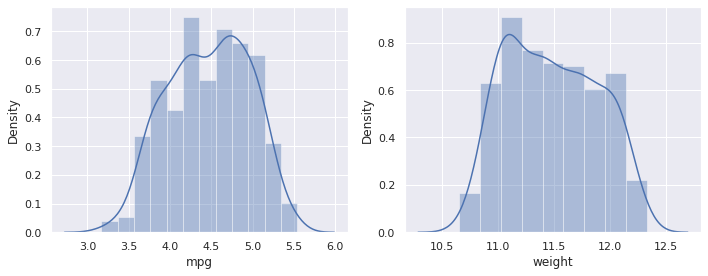

In [ ]:
#Statistical Tests for Numerical Attributes

nums = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

#Visual Normality Checks

fig = pyplot.figure(1, (10, 4))

ax = pyplot.subplot(1,2,1)
sns.distplot(np.log2(df.mpg))
pyplot.tight_layout()

ax = pyplot.subplot(1,2,2)
sns.distplot(np.log2(df.weight))
pyplot.tight_layout()

pyplot.show()

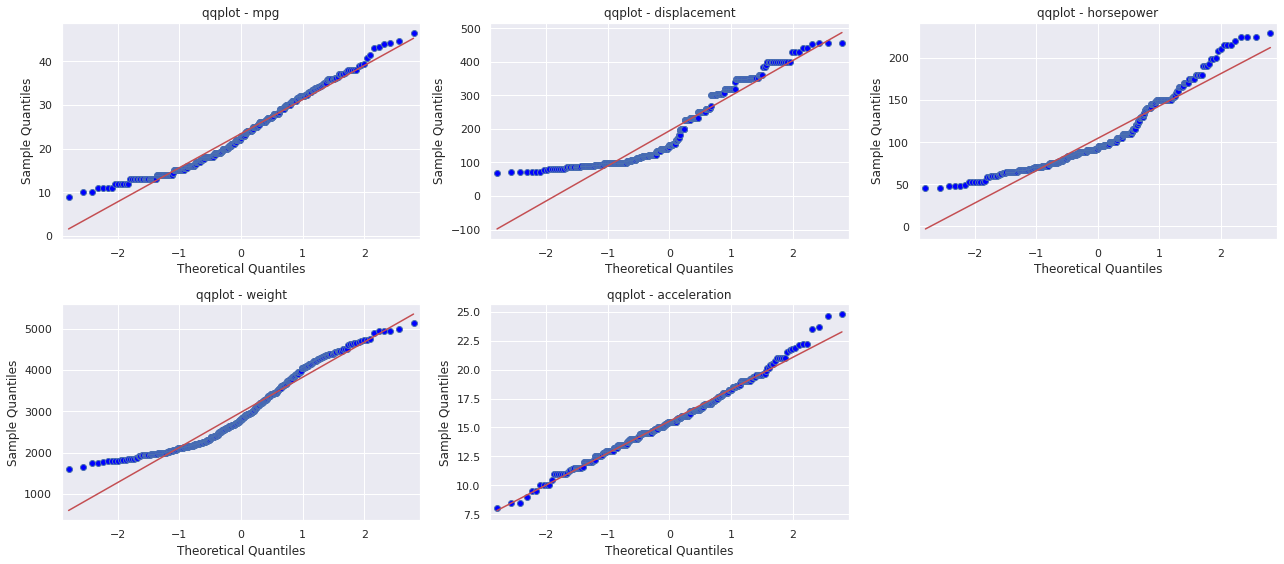

In [ ]:
# quantile-quantile plots on original data
fig = pyplot.figure(1, (18,8))

for i,num in enumerate(nums):
    ax = pyplot.subplot(2,3,i+1)
    qqplot(df[num], line= 's', ax=ax)
    ax.set_title(f'qqplot - {num}')
    pyplot.tight_layout()

In [ ]:
#Statistical Normality Tests
#shapiro wilk test
def shapiro_wilk_test(df: pd.DataFrame, cols: list, alpha=0.05):
    # test the null hypothesis for columns given in `cols` of the dataframe `df` under significance level `alpha`.
    for col in cols:
        _,p = stats.shapiro(df[col])
        if p <= alpha:
            print(f'''\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed''')

     
_, p = stats.shapiro(df.acceleration)
p # 0.03054318018257618

shapiro_wilk_test(df, nums)



Rejected H0 under significance level 0.05
mpg doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
displacement doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
weight doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
acceleration doesn't seems to be normally distributed


In [ ]:
#Power Transform

from sklearn.preprocessing import PowerTransformer

df_tfnum = pd.DataFrame(PowerTransformer().fit_transform(df[nums]), columns=nums)
df_tfnum.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,mpg,displacement,horsepower,weight,acceleration
0,-0.635451,1.119336,0.854984,0.0,-1.317572
1,-1.142697,1.324530,1.443754,0.0,-1.522941
2,-0.635451,1.175211,1.216062,0.0,-1.732292
3,-0.965340,1.103648,1.216062,0.0,-1.317572
4,-0.796543,1.093078,1.044925,0.0,-1.945873


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

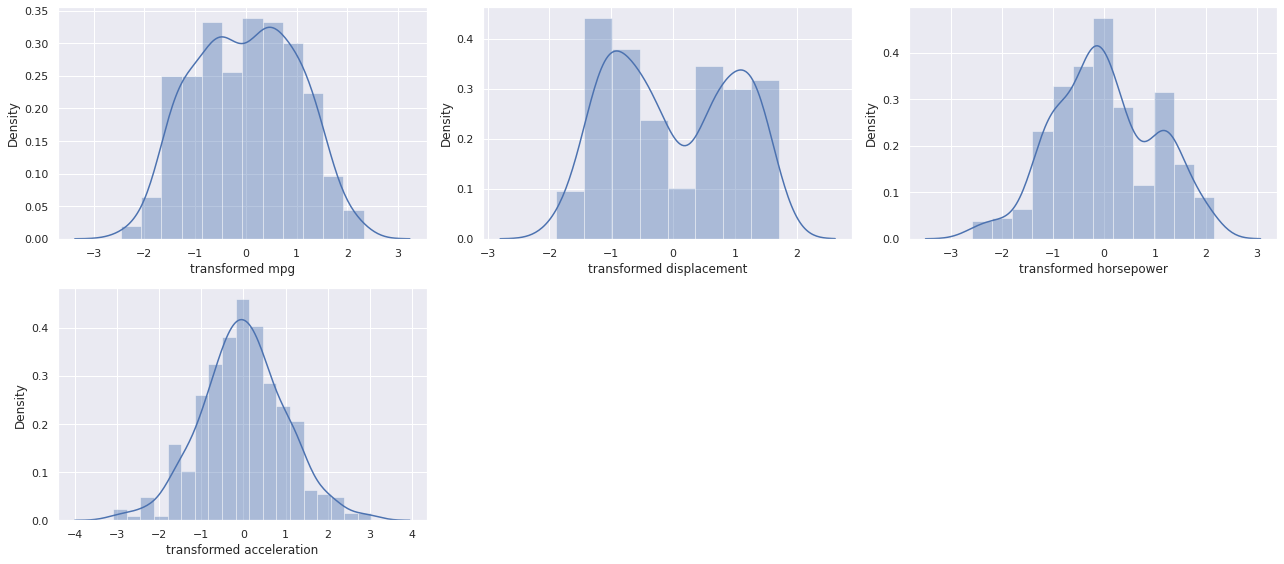

In [ ]:
#Plot Histogram
fig = pyplot.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = pyplot.subplot(2,3,i+1)
    sns.distplot(df_tfnum[num])
    ax.set_xlabel(f'transformed {num}')
    pyplot.tight_layout()

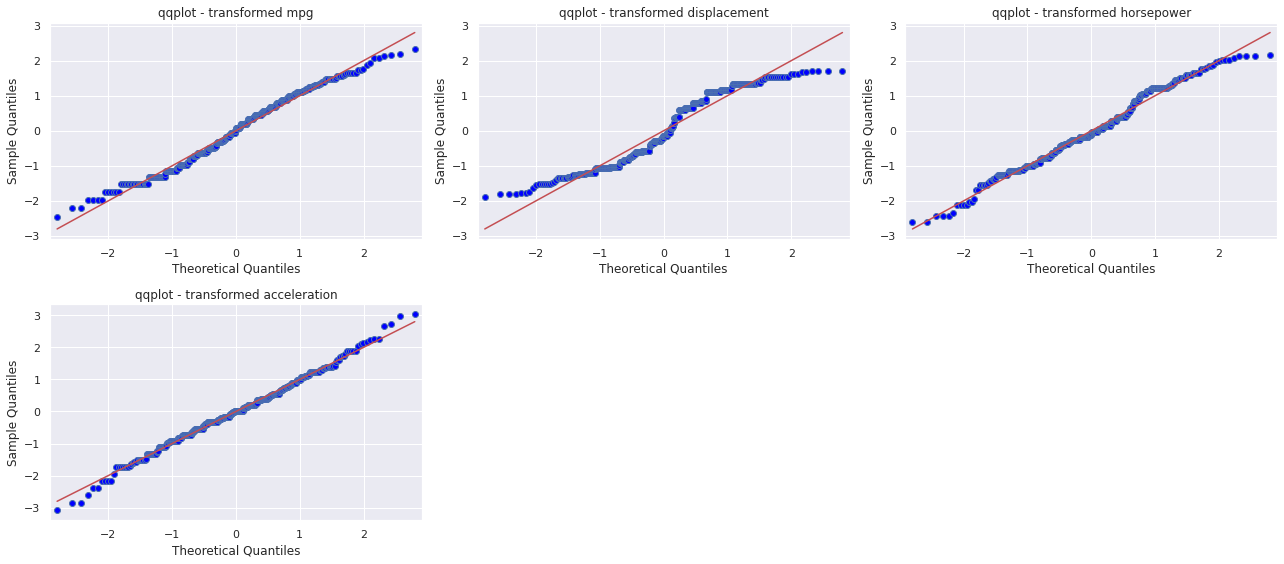

In [ ]:
#plot quantile-quantile graph on transformed data

fig = pyplot.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = pyplot.subplot(2,3,i+1)
    qqplot(df_tfnum[num], line='s', ax=ax)
    ax.set_title(f'qqplot - transformed {num}')
    pyplot.tight_layout()